## Title of ML project: 
Predictive Modeling of Joint Current for Fault Detection and Performance Optimization in Robotic Systems
## Name: SRUTHI S L
## Organization: Entri Elevate 
## Date:

 ## 1. Overview of Problem Statement:
The growing adoption of collaborative robots (cobots) in industrial applications demands strict adherence to safety standards to protect human operators during Human-Robot Collaboration (HRC). Current industry regulations mandate continuous online monitoring of cobot speed, joint current and temperatures and the maintenance of a safe separation distance, especially when robots operate at high speeds, handle heavy loads, or utilize dangerous tools. These measures are critical for minimizing the risk of accidents and ensuring workplace safety. By integrating predictive analytics into the scope of online monitoring, cobot systems can move from reactive safety measures to proactive fault detection and safe stop prediction.
This project addresses employing regression analysis of joint current in the UR3 cobot system. Joint currents, which serve as vital indicators of robotic health, can signal potential failures or inefficiencies before they escalate into critical issues. The aim is to enhance the predictive capabilities of existing systems, facilitating fault detection, safe stop implementation, and overall operational optimization. The project aims to enhance the reliability and functionality of cobots in modern industrial environments by combining safety compliance with advanced predictive maintenance.

Referece: Aliev, Khurshid, and Dario Antonelli. "Proposal of a monitoring system for collaborative robots to predict outages and to assess reliability factors exploiting machine learning." Applied Sciences 11.4 (2021): 1621.

## 2. Objective:
To predict the operational parameter, joint current, for fault detection and optimization of colloborative robots.

## 3.Data Description:
### Source: 
https://archive.ics.uci.edu/dataset/963/ur3+cobotops
### Features:
The UR3 Cobot dataset contains the information of currents, temperature, speed of the six joints of the Cobot, cycle , Tool current, Robot protective stop and grip lost
![Alt text](ur3_joints-the-construct.png)
1. Current_J0
2. Temperature_T0	
3. Current_J1	
4. Temperature_J1	
5. Current_J2	
6. Temperature_J2	
7. Current_J3	
8. Temperature_J3	
9. Speed_J0	
10. Speed_J1	
11. Speed_J2	
12. Speed_J3	
13. Speed_J4	
14. Speed_J5	
15. Tool_current	
16. cycle	
17. Robot_ProtectiveStop	
18. grip_lost

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

 ## 4. Data Collection:
 

In [2]:
data=pd.read_excel('UR3_Cobot.xlsx')

In [3]:
data

Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0        1  2022-10-26T08:17:21.847Z    0.109628         27.8750   -2.024669   
1        2  2022-10-26T08:17:22.852Z    0.595605         27.8750   -2.278456   
2        3  2022-10-26T08:17:23.857Z   -0.229474         27.8750   -2.800408   
3        4  2022-10-26T08:17:24.863Z    0.065053         27.8750   -3.687768   
4        5  2022-10-26T08:17:25.877Z    0.884140         27.8750   -2.938830   
...    ...                       ...         ...             ...         ...   
7404  7405  2022-10-26T15:36:02.555Z   -0.109017         37.1875   -2.261695   
7405  7406  2022-10-26T15:36:03.562Z   -0.098536         37.1875   -2.251992   
7406  7407  2022-10-26T15:36:04.571Z   -0.121100         37.1875   -2.280791   
7407  7408  2022-10-26T15:36:05.572Z   -0.129370         37.1875   -2.269061   
7408  7409  2022-10-26T15:36:06.580Z   -0.134429         37.1250   -2.244449   

      Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0            29.3750   -1.531442         29.3750   -0.998570         32.1250   
1            29.3125   -0.866556         29.4375   -0.206097         32.1875   
2            29.3125   -2.304336         29.4375   -0.351499         32.1250   
3            29.3125   -1.217652         29.4375   -1.209115         32.1250   
4            29.3750   -1.794076         29.4375   -2.356471         32.1875   
...              ...         ...             ...         ...             ...   
7404         40.3125   -1.082678         40.6875   -0.494714         43.3750   
7405         40.3125   -1.094420         40.6875   -0.515789         43.3750   
7406         40.2500   -1.121319         40.6875   -0.502406         43.3750   
7407         40.3125   -1.091610         40.6250   -0.491158         43.3750   
7408         40.3125   -1.098950         40.6875   -0.502397         43.3750   

      ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0     ...  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479 -0.152962   
1     ... -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767  0.000417   
2     ...  1.369386e-01  0.007795 -2.535874  0.379867  0.000455 -0.496856   
3     ... -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411  0.425559   
4     ...  1.268088e-01  0.005567  0.001138 -0.353284  0.014994  0.180989   
...   ...           ...       ...       ...       ...       ...       ...   
7404  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7405  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7406  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7407  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7408  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   

      Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0         0.082732       1                   0.0      False  
1         0.505895       1                   0.0      False  
2         0.079420       1                   0.0      False  
3         0.083325       1                   0.0      False  
4         0.086379       1                   0.0      False  
...            ...     ...                   ...        ...  
7404      0.080013     264                   0.0      False  
7405      0.078740     264                   0.0      False  
7406      0.091471     264                   0.0      False  
7407      0.090026     264                   0.0      False  
7408      0.089097     264                   0.0      False  

[7409 rows x 24 columns]

In [5]:
columns=['Num','Timestamp']

In [6]:
df=data.drop(columns,axis=1)

In [6]:
df

Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0       0.109628         27.8750   -2.024669         29.3750   -1.531442   
1       0.595605         27.8750   -2.278456         29.3125   -0.866556   
2      -0.229474         27.8750   -2.800408         29.3125   -2.304336   
3       0.065053         27.8750   -3.687768         29.3125   -1.217652   
4       0.884140         27.8750   -2.938830         29.3750   -1.794076   
...          ...             ...         ...             ...         ...   
7404   -0.109017         37.1875   -2.261695         40.3125   -1.082678   
7405   -0.098536         37.1875   -2.251992         40.3125   -1.094420   
7406   -0.121100         37.1875   -2.280791         40.2500   -1.121319   
7407   -0.129370         37.1875   -2.269061         40.3125   -1.091610   
7408   -0.134429         37.1250   -2.244449         40.3125   -1.098950   

      Temperature_J2  Current_J3  Temperature_J3  Current_J4  Temperature_J4  \
0            29.3750   -0.998570         32.1250   -0.062540         32.2500   
1            29.4375   -0.206097         32.1875   -1.062762         32.2500   
2            29.4375   -0.351499         32.1250   -0.668869         32.3125   
3            29.4375   -1.209115         32.1250   -0.819755         32.2500   
4            29.4375   -2.356471         32.1875   -0.966427         32.3125   
...              ...         ...             ...         ...             ...   
7404         40.6875   -0.494714         43.3750   -0.019447         45.2500   
7405         40.6875   -0.515789         43.3750   -0.009186         45.2500   
7406         40.6875   -0.502406         43.3750   -0.002978         45.2500   
7407         40.6250   -0.491158         43.3750   -0.001136         45.2500   
7408         40.6875   -0.502397         43.3750   -0.025829         45.2500   

      ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0     ...  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479 -0.152962   
1     ... -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767  0.000417   
2     ...  1.369386e-01  0.007795 -2.535874  0.379867  0.000455 -0.496856   
3     ... -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411  0.425559   
4     ...  1.268088e-01  0.005567  0.001138 -0.353284  0.014994  0.180989   
...   ...           ...       ...       ...       ...       ...       ...   
7404  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7405  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7406  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7407  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7408  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   

      Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0         0.082732       1                   0.0      False  
1         0.505895       1                   0.0      False  
2         0.079420       1                   0.0      False  
3         0.083325       1                   0.0      False  
4         0.086379       1                   0.0      False  
...            ...     ...                   ...        ...  
7404      0.080013     264                   0.0      False  
7405      0.078740     264                   0.0      False  
7406      0.091471     264                   0.0      False  
7407      0.090026     264                   0.0      False  
7408      0.089097     264                   0.0      False  

[7409 rows x 22 columns]

In [7]:
df.head(15)

Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0     0.109628         27.8750   -2.024669         29.3750   -1.531442   
1     0.595605         27.8750   -2.278456         29.3125   -0.866556   
2    -0.229474         27.8750   -2.800408         29.3125   -2.304336   
3     0.065053         27.8750   -3.687768         29.3125   -1.217652   
4     0.884140         27.8750   -2.938830         29.3750   -1.794076   
5     0.118961         27.8125   -2.162542         29.3750   -1.211779   
6     0.086138         27.8750   -1.757647         29.3750   -0.960634   
7     0.075657         27.8750   -1.836465         29.3750   -0.961322   
8    -0.186848         27.8750   -2.563738         29.3750   -1.418934   
9    -0.158912         27.8750   -1.750777         29.3750   -1.979400   
10    1.014086         27.8750   -1.875296         29.3750   -0.549353   
11   -0.401868         27.8750   -3.174602         29.3750   -1.050977   
12   -0.888249         27.8750   -1.724174         29.3750   -1.741693   
13   -0.048898         27.8750   -2.023628         29.4375   -1.574188   
14    0.298313         27.8750   -1.755526         29.3750   -0.730018   

    Temperature_J2  Current_J3  Temperature_J3  Current_J4  Temperature_J4  \
0          29.3750   -0.998570         32.1250   -0.062540         32.2500   
1          29.4375   -0.206097         32.1875   -1.062762         32.2500   
2          29.4375   -0.351499         32.1250   -0.668869         32.3125   
3          29.4375   -1.209115         32.1250   -0.819755         32.2500   
4          29.4375   -2.356471         32.1875   -0.966427         32.3125   
5          29.4375   -0.481834         32.1875    0.015318         32.3125   
6          29.4375   -0.488380         32.1875    0.006506         32.3125   
7          29.4375   -0.512541         32.1875   -0.021845         32.3125   
8          29.4375   -0.262015         32.1875    0.099942         32.3125   
9          29.4375   -0.184550         32.1875    0.079157         32.3125   
10         29.4375   -0.782304         32.1875   -0.159290         32.3125   
11         29.5000   -0.396679         32.1875   -0.114071         32.3125   
12         29.5000   -0.098952         32.1875    0.279281         32.3750   
13         29.4375   -0.459635         32.2500    0.092370         32.3750   
14         29.5000   -0.839851         32.2500   -0.145941         32.3750   

    ...      Speed_J0  Speed_J1  Speed_J2      Speed_J3      Speed_J4  \
0   ...  2.955651e-01 -0.000490  0.001310 -1.328356e-01 -7.478529e-03   
1   ... -7.391485e-30 -0.000304  0.002185  1.668227e-03 -7.668273e-04   
2   ...  1.369386e-01  0.007795 -2.535874  3.798670e-01  4.545622e-04   
3   ... -9.030032e-02 -0.004911 -0.009096 -3.841961e-01  1.841084e-02   
4   ...  1.268088e-01  0.005567  0.001138 -3.532840e-01  1.499380e-02   
5   ... -4.639511e-05  0.000093  0.000262  2.170784e-03  2.647067e-04   
6   ...  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000e+00   
7   ...  0.000000e+00  0.000000  0.000000  0.000000e+00  0.000000e+00   
8   ... -1.660036e-01  0.002409 -0.015483  3.500632e-01 -9.985541e-03   
9   ...  9.832304e-02  0.004996 -0.016996  4.962411e-01 -1.735275e-02   
10  ...  2.559032e-03 -0.006559  2.594071 -5.797710e-01  0.000000e+00   
11  ... -2.380603e-01 -0.030145 -0.032799  2.323235e-01  6.414579e-02   
12  ...  1.021897e-01  0.145654 -2.524552  3.932935e-01  0.000000e+00   
13  ...  0.000000e+00  0.000000 -0.000265  5.332777e-21 -4.225521e-32   
14  ...  1.817568e-01 -0.036899  0.031122 -4.016817e-01  1.601462e-02   

        Speed_J5  Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0  -1.529622e-01      0.082732       1                   0.0      False  
1   4.169016e-04      0.505895       1                   0.0      False  
2  -4.968559e-01      0.079420       1                   0.0      False  
3   4.255591e-01      0.083325       1                   0.0      False  
4   1.809886e-01      0.086379 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Current_J0            7363 non-null   float64
 1   Temperature_T0        7355 non-null   float64
 2   Current_J1            7355 non-null   float64
 3   Temperature_J1        7355 non-null   float64
 4   Current_J2            7355 non-null   float64
 5   Temperature_J2        7355 non-null   float64
 6   Current_J3            7355 non-null   float64
 7   Temperature_J3        7355 non-null   float64
 8   Current_J4            7355 non-null   float64
 9   Temperature_J4        7355 non-null   float64
 10  Current_J5            7355 non-null   float64
 11  Temperature_J5        7355 non-null   float64
 12  Speed_J0              7355 non-null   float64
 13  Speed_J1              7355 non-null   float64
 14  Speed_J2              7355 non-null   float64
 15  Speed_J3             

In [9]:
# Basic Statistics
df.describe()

Current_J0  Temperature_T0   Current_J1  Temperature_J1   Current_J2  \
count  7363.000000     7355.000000  7355.000000     7355.000000  7355.000000   
mean     -0.048934       34.906781    -2.297936       37.659636    -1.199381   
std       0.829395        2.762057     0.800450        3.247315     0.609984   
min      -6.247756       27.812500    -5.808734       29.312500    -4.171966   
25%      -0.195026       33.000000    -2.664919       35.375000    -1.552803   
50%      -0.080830       36.500000    -2.236342       39.687500    -1.077137   
75%       0.095959       37.062500    -1.778334       40.125000    -0.838721   
max       6.806938       37.250000     1.083596       40.500000     2.464940   

       Temperature_J2   Current_J3  Temperature_J3   Current_J4  \
count     7355.000000  7355.000000     7355.000000  7355.000000   
mean        38.064064    -0.605312       40.936999    -0.022968   
std          3.311948     0.514937        3.182399     0.630789   
min         29.375000    -3.333102       32.125000    -4.738406   
25%         35.750000    -0.830933       38.937500    -0.125809   
50%         40.187500    -0.571190       43.062500    -0.012325   
75%         40.437500    -0.388398       43.125000     0.086098   
max         40.937500     2.270268       43.437500     4.089389   

       Temperature_J4  ...  Temperature_J5     Speed_J0     Speed_J1  \
count     7355.000000  ...     7355.000000  7355.000000  7355.000000   
mean        42.605167  ...       41.891094     0.001671     0.000061   
std          3.677670  ...        3.680003     0.148826     0.049370   
min         32.250000  ...       32.000000    -0.656331    -0.330833   
25%         40.375000  ...       39.500000    -0.000483    -0.000659   
50%         45.062500  ...       44.375000     0.000000     0.000000   
75%         45.187500  ...       44.500000     0.002115     0.000540   
max         45.375000  ...       44.937500     0.791929     0.615526   

          Speed_J2     Speed_J3     Speed_J4     Speed_J5  Tool_current  \
count  7355.000000  7355.000000  7355.000000  7355.000000   7355.000000   
mean      0.003791    -0.004610    -0.000810     0.002880      0.109527   
std       0.729422     0.359999     0.038436     0.313953      0.078832   
min      -2.733091    -1.271460    -0.226233    -1.629721      0.020180   
25%      -0.004100    -0.005365    -0.000120    -0.000803      0.082387   
50%       0.000000     0.000000     0.000000     0.000000      0.085192   
75%       0.000205     0.009912     0.000066     0.012924      0.089518   
max       2.679848     1.363093     0.193914     1.378015      0.602054   

            cycle   Robot_ProtectiveStop  
count  7409.000000           7355.000000  
mean    141.113241              0.037797  
std      80.542340              0.190719  
min       1.000000              0.000000  
25%      68.000000              0.000000  
50%     154.000000              0.000000  
75%     218.000000              0.000000  
max     264.000000              1.000000  

[8 rows x 21 columns]

## 5. Data Preprocessing- Data Cleaning:


In [10]:
# Checking null values
df.isnull().sum()

Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In this dataset, the majority of columns have 54 missing values, implying that all features in these 54 rows are missing. Removing these rows, which account for only 0.7% of the total data, has minimal impact on the dataset. On the other hand, applying imputation techniques could introduce complications and obscure the dataset's relevant characteristics.

In [7]:
# Dropping null values
df_clean=df.dropna()

In [8]:
df_clean

Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0       0.109628         27.8750   -2.024669         29.3750   -1.531442   
1       0.595605         27.8750   -2.278456         29.3125   -0.866556   
2      -0.229474         27.8750   -2.800408         29.3125   -2.304336   
3       0.065053         27.8750   -3.687768         29.3125   -1.217652   
4       0.884140         27.8750   -2.938830         29.3750   -1.794076   
...          ...             ...         ...             ...         ...   
7404   -0.109017         37.1875   -2.261695         40.3125   -1.082678   
7405   -0.098536         37.1875   -2.251992         40.3125   -1.094420   
7406   -0.121100         37.1875   -2.280791         40.2500   -1.121319   
7407   -0.129370         37.1875   -2.269061         40.3125   -1.091610   
7408   -0.134429         37.1250   -2.244449         40.3125   -1.098950   

      Temperature_J2  Current_J3  Temperature_J3  Current_J4  Temperature_J4  \
0            29.3750   -0.998570         32.1250   -0.062540         32.2500   
1            29.4375   -0.206097         32.1875   -1.062762         32.2500   
2            29.4375   -0.351499         32.1250   -0.668869         32.3125   
3            29.4375   -1.209115         32.1250   -0.819755         32.2500   
4            29.4375   -2.356471         32.1875   -0.966427         32.3125   
...              ...         ...             ...         ...             ...   
7404         40.6875   -0.494714         43.3750   -0.019447         45.2500   
7405         40.6875   -0.515789         43.3750   -0.009186         45.2500   
7406         40.6875   -0.502406         43.3750   -0.002978         45.2500   
7407         40.6250   -0.491158         43.3750   -0.001136         45.2500   
7408         40.6875   -0.502397         43.3750   -0.025829         45.2500   

      ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0     ...  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479 -0.152962   
1     ... -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767  0.000417   
2     ...  1.369386e-01  0.007795 -2.535874  0.379867  0.000455 -0.496856   
3     ... -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411  0.425559   
4     ...  1.268088e-01  0.005567  0.001138 -0.353284  0.014994  0.180989   
...   ...           ...       ...       ...       ...       ...       ...   
7404  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7405  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7406  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7407  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7408  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   

      Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0         0.082732       1                   0.0      False  
1         0.505895       1                   0.0      False  
2         0.079420       1                   0.0      False  
3         0.083325       1                   0.0      False  
4         0.086379       1                   0.0      False  
...            ...     ...                   ...        ...  
7404      0.080013     264                   0.0      False  
7405      0.078740     264                   0.0      False  
7406      0.091471     264                   0.0      False  
7407      0.090026     264                   0.0      False  
7408      0.089097     264                   0.0      False  

[7355 rows x 22 columns]

In [9]:
# Setting the correct index
df_clean =df_clean.reset_index()

In [14]:
# Checking whether the null values are removed
df_clean.isnull().sum()

index                   0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

In [15]:
# Checking duplicates 
df_clean.duplicated().sum()

np.int64(0)

In [16]:
num_columns=df_clean.select_dtypes(include='number')

In [17]:
num_columns

index  Current_J0  Temperature_T0  Current_J1  Temperature_J1  \
0         0    0.109628         27.8750   -2.024669         29.3750   
1         1    0.595605         27.8750   -2.278456         29.3125   
2         2   -0.229474         27.8750   -2.800408         29.3125   
3         3    0.065053         27.8750   -3.687768         29.3125   
4         4    0.884140         27.8750   -2.938830         29.3750   
...     ...         ...             ...         ...             ...   
7350   7404   -0.109017         37.1875   -2.261695         40.3125   
7351   7405   -0.098536         37.1875   -2.251992         40.3125   
7352   7406   -0.121100         37.1875   -2.280791         40.2500   
7353   7407   -0.129370         37.1875   -2.269061         40.3125   
7354   7408   -0.134429         37.1250   -2.244449         40.3125   

      Current_J2  Temperature_J2  Current_J3  Temperature_J3  Current_J4  ...  \
0      -1.531442         29.3750   -0.998570         32.1250   -0.062540  ...   
1      -0.866556         29.4375   -0.206097         32.1875   -1.062762  ...   
2      -2.304336         29.4375   -0.351499         32.1250   -0.668869  ...   
3      -1.217652         29.4375   -1.209115         32.1250   -0.819755  ...   
4      -1.794076         29.4375   -2.356471         32.1875   -0.966427  ...   
...          ...             ...         ...             ...         ...  ...   
7350   -1.082678         40.6875   -0.494714         43.3750   -0.019447  ...   
7351   -1.094420         40.6875   -0.515789         43.3750   -0.009186  ...   
7352   -1.121319         40.6875   -0.502406         43.3750   -0.002978  ...   
7353   -1.091610         40.6250   -0.491158         43.3750   -0.001136  ...   
7354   -1.098950         40.6875   -0.502397         43.3750   -0.025829  ...   

      Temperature_J5      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  \
0            32.0000  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479   
1            32.0000 -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767   
2            32.0625  1.369386e-01  0.007795 -2.535874  0.379867  0.000455   
3            32.0000 -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411   
4            32.0000  1.268088e-01  0.005567  0.001138 -0.353284  0.014994   
...              ...           ...       ...       ...       ...       ...   
7350         44.5625  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
7351         44.5000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
7352         44.5000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
7353         44.5625  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
7354         44.5625  0.000000e+00  0.000000  0.000000  0.000000  0.000000   

      Speed_J5  Tool_current  cycle   Robot_ProtectiveStop  
0    -0.152962      0.082732       1                   0.0  
1     0.000417      0.505895       1                   0.0  
2    -0.496856      0.079420       1                   0.0  
3     0.425559      0.083325       1                   0.0  
4     0.180989      0.086379       1                   0.0  
...        ...           ...     ...                   ...  
7350  0.000000      0.080013     264                   0.0  
7351  0.000000      0.078740     264                   0.0  
7352  0.000000      0.091471     264                   0.0  
7353  0.000000      0.090026     264                   0.0  
7354  0.000000      0.089097     264                   0.0  

[7355 rows x 22 columns]

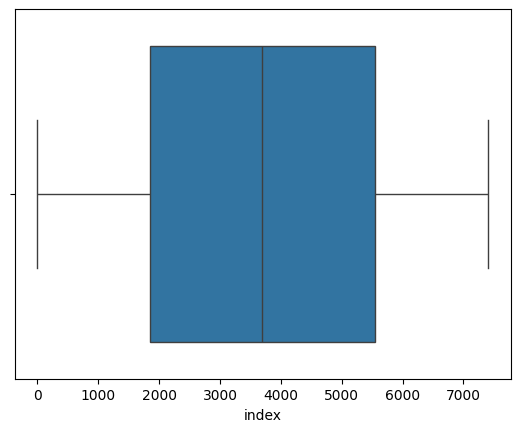

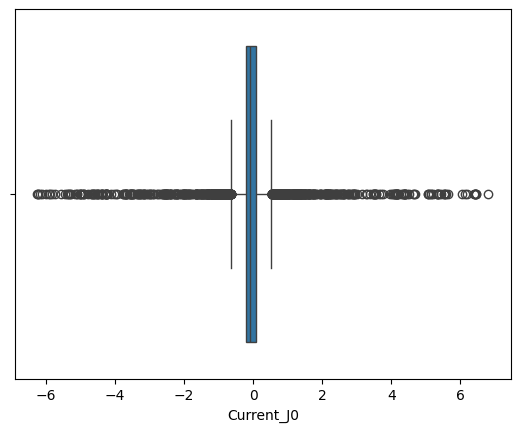

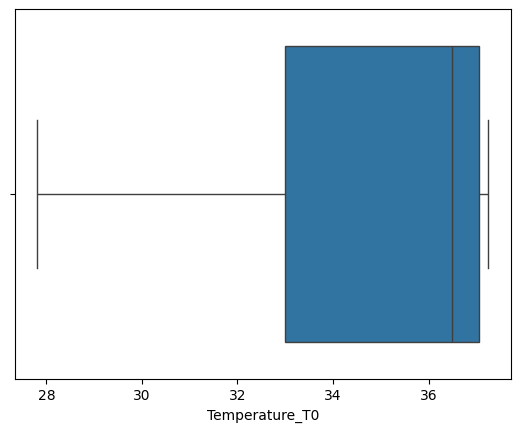

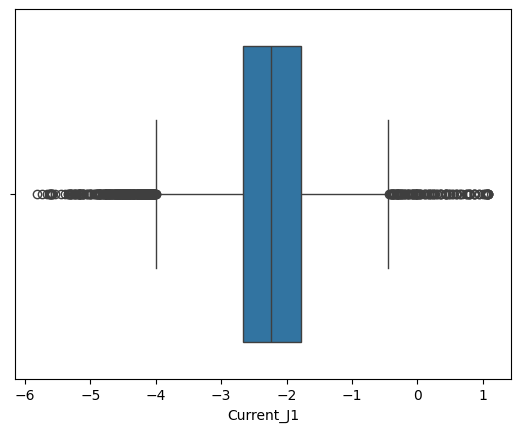

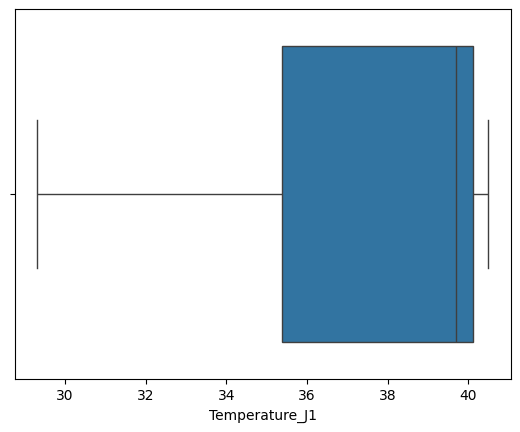

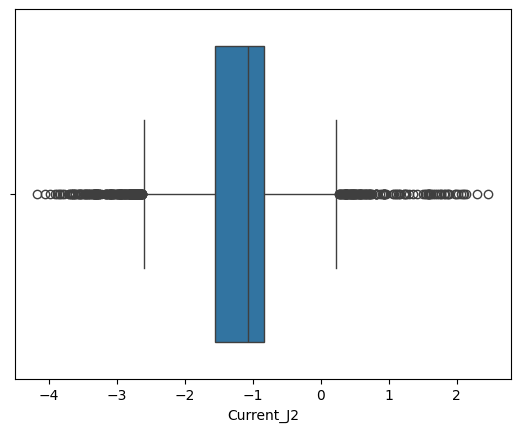

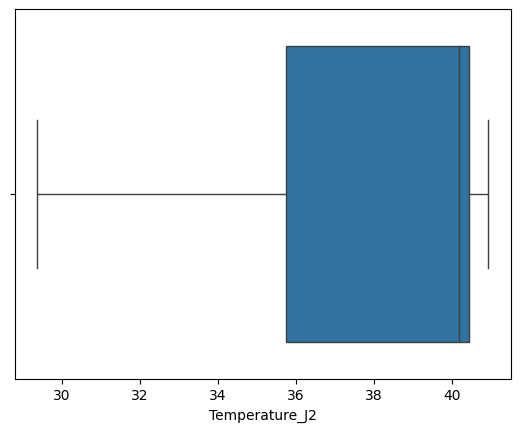

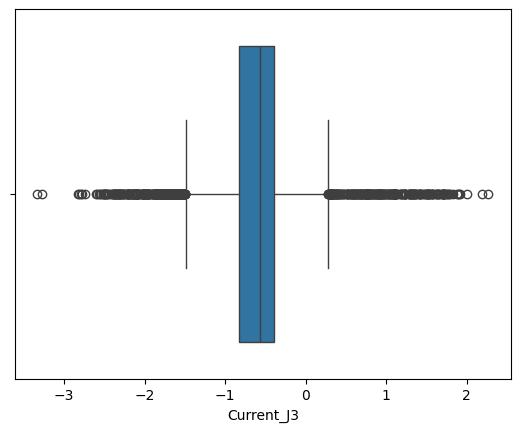

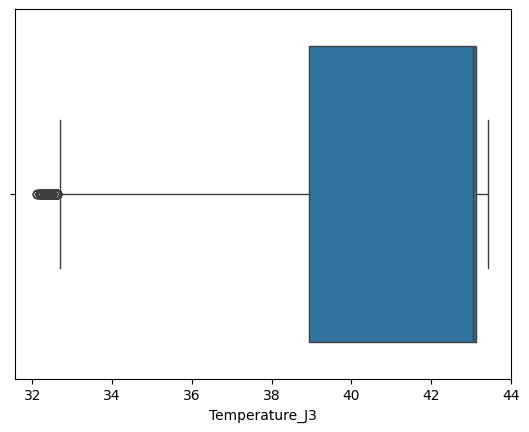

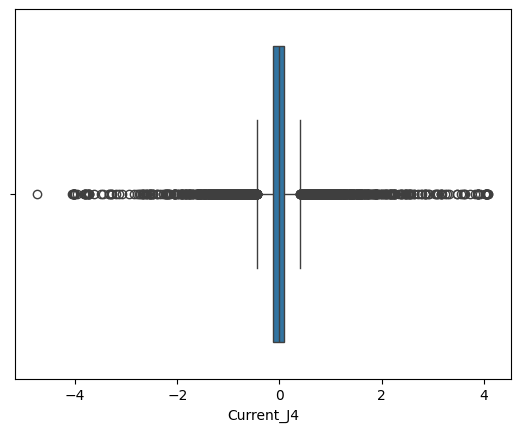

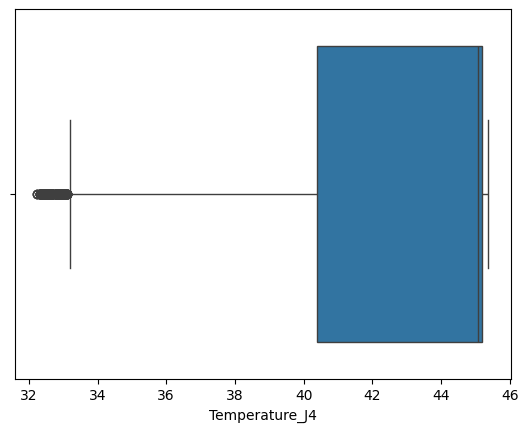

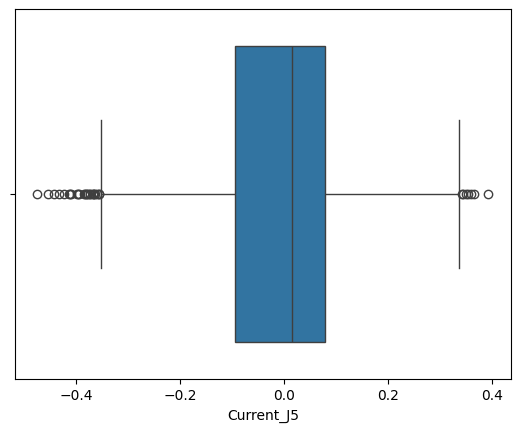

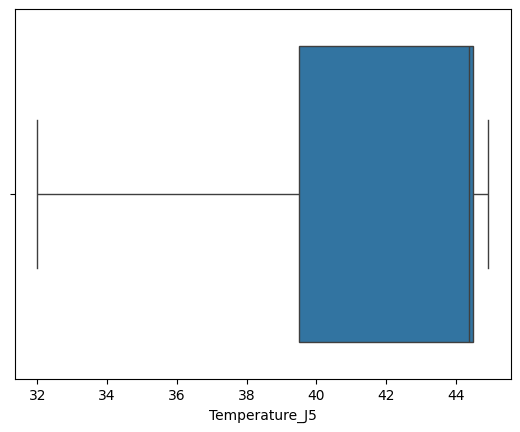

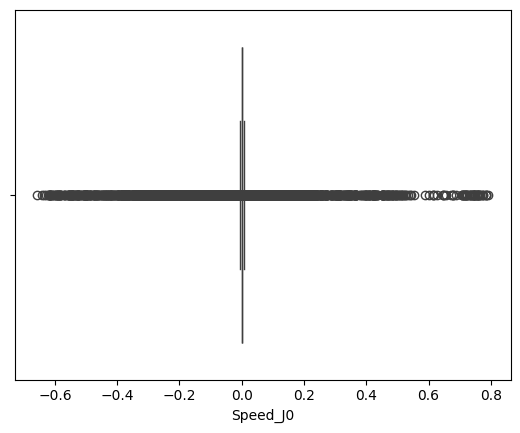

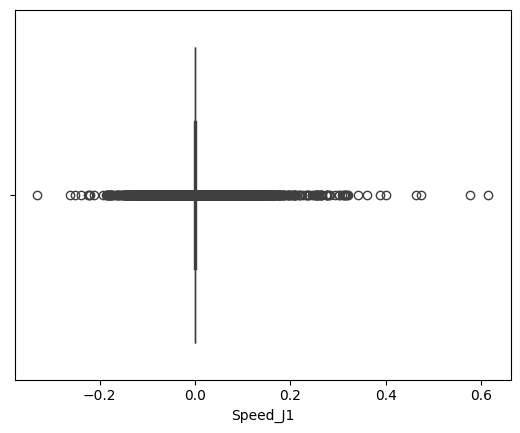

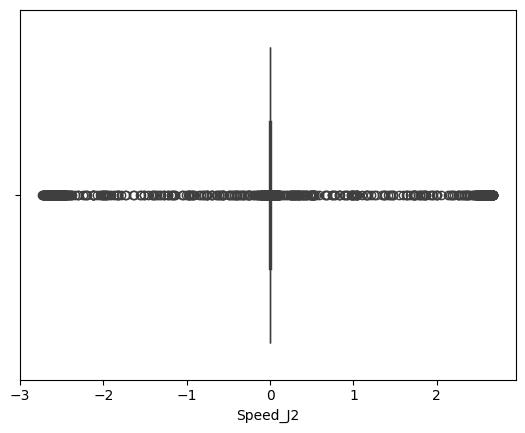

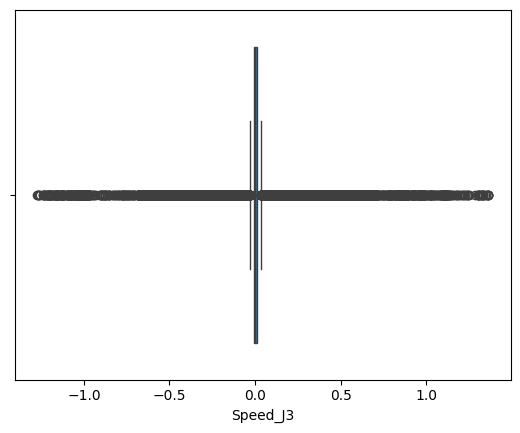

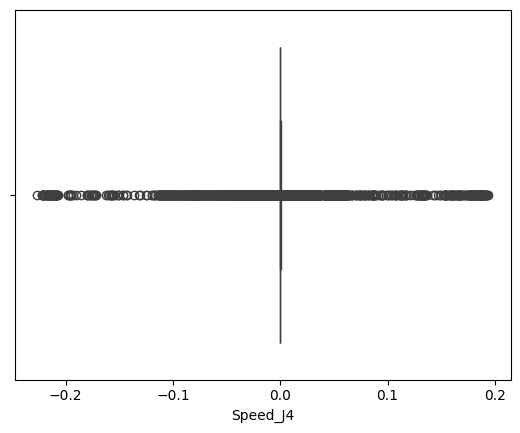

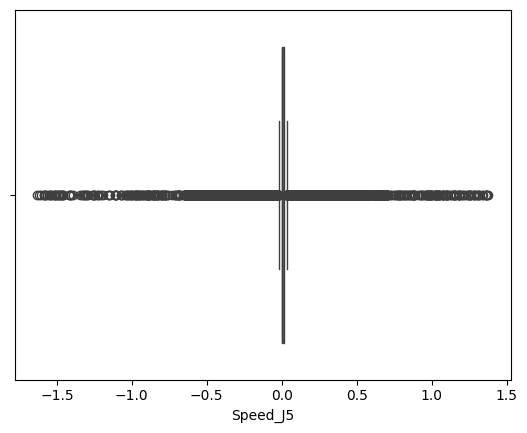

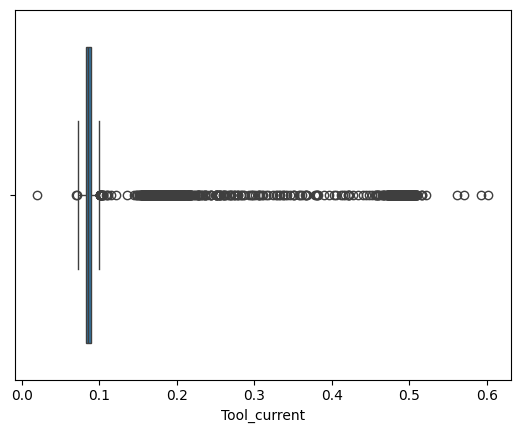

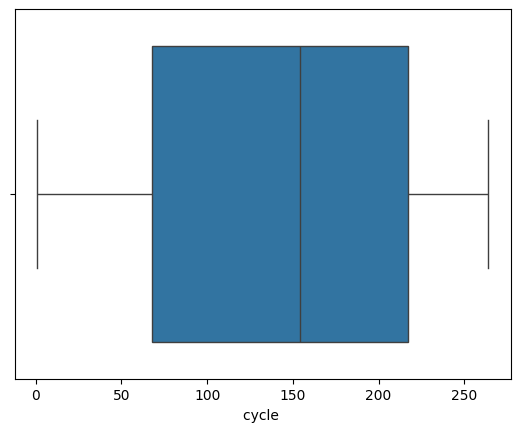

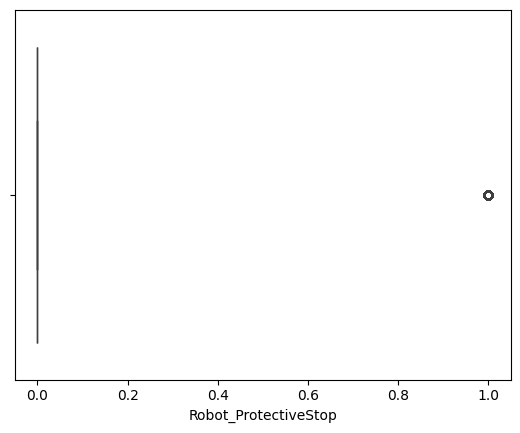

In [18]:
# Box plot
for i in num_columns.columns:
    sns.boxplot(data=df_clean,x=i)
    plt.show()

Here the outliers represent actual variations in the robot’s performance (e.g., rapid movements, stops, or faults), 
so they are critical for understanding its behavior. Removing these would eliminate valuable insights about edge cases or anomalies.

## 6. Exploratory Data Analysis (EDA):

## Plotting histogram for gaining insights about the distribution of data
The column Robots's protective stop has boolean values 0s and 1s which represents cobot's working state and safe stop state respectively. They are categorical values and hence the other features are used to plot the histogram to derive insights.

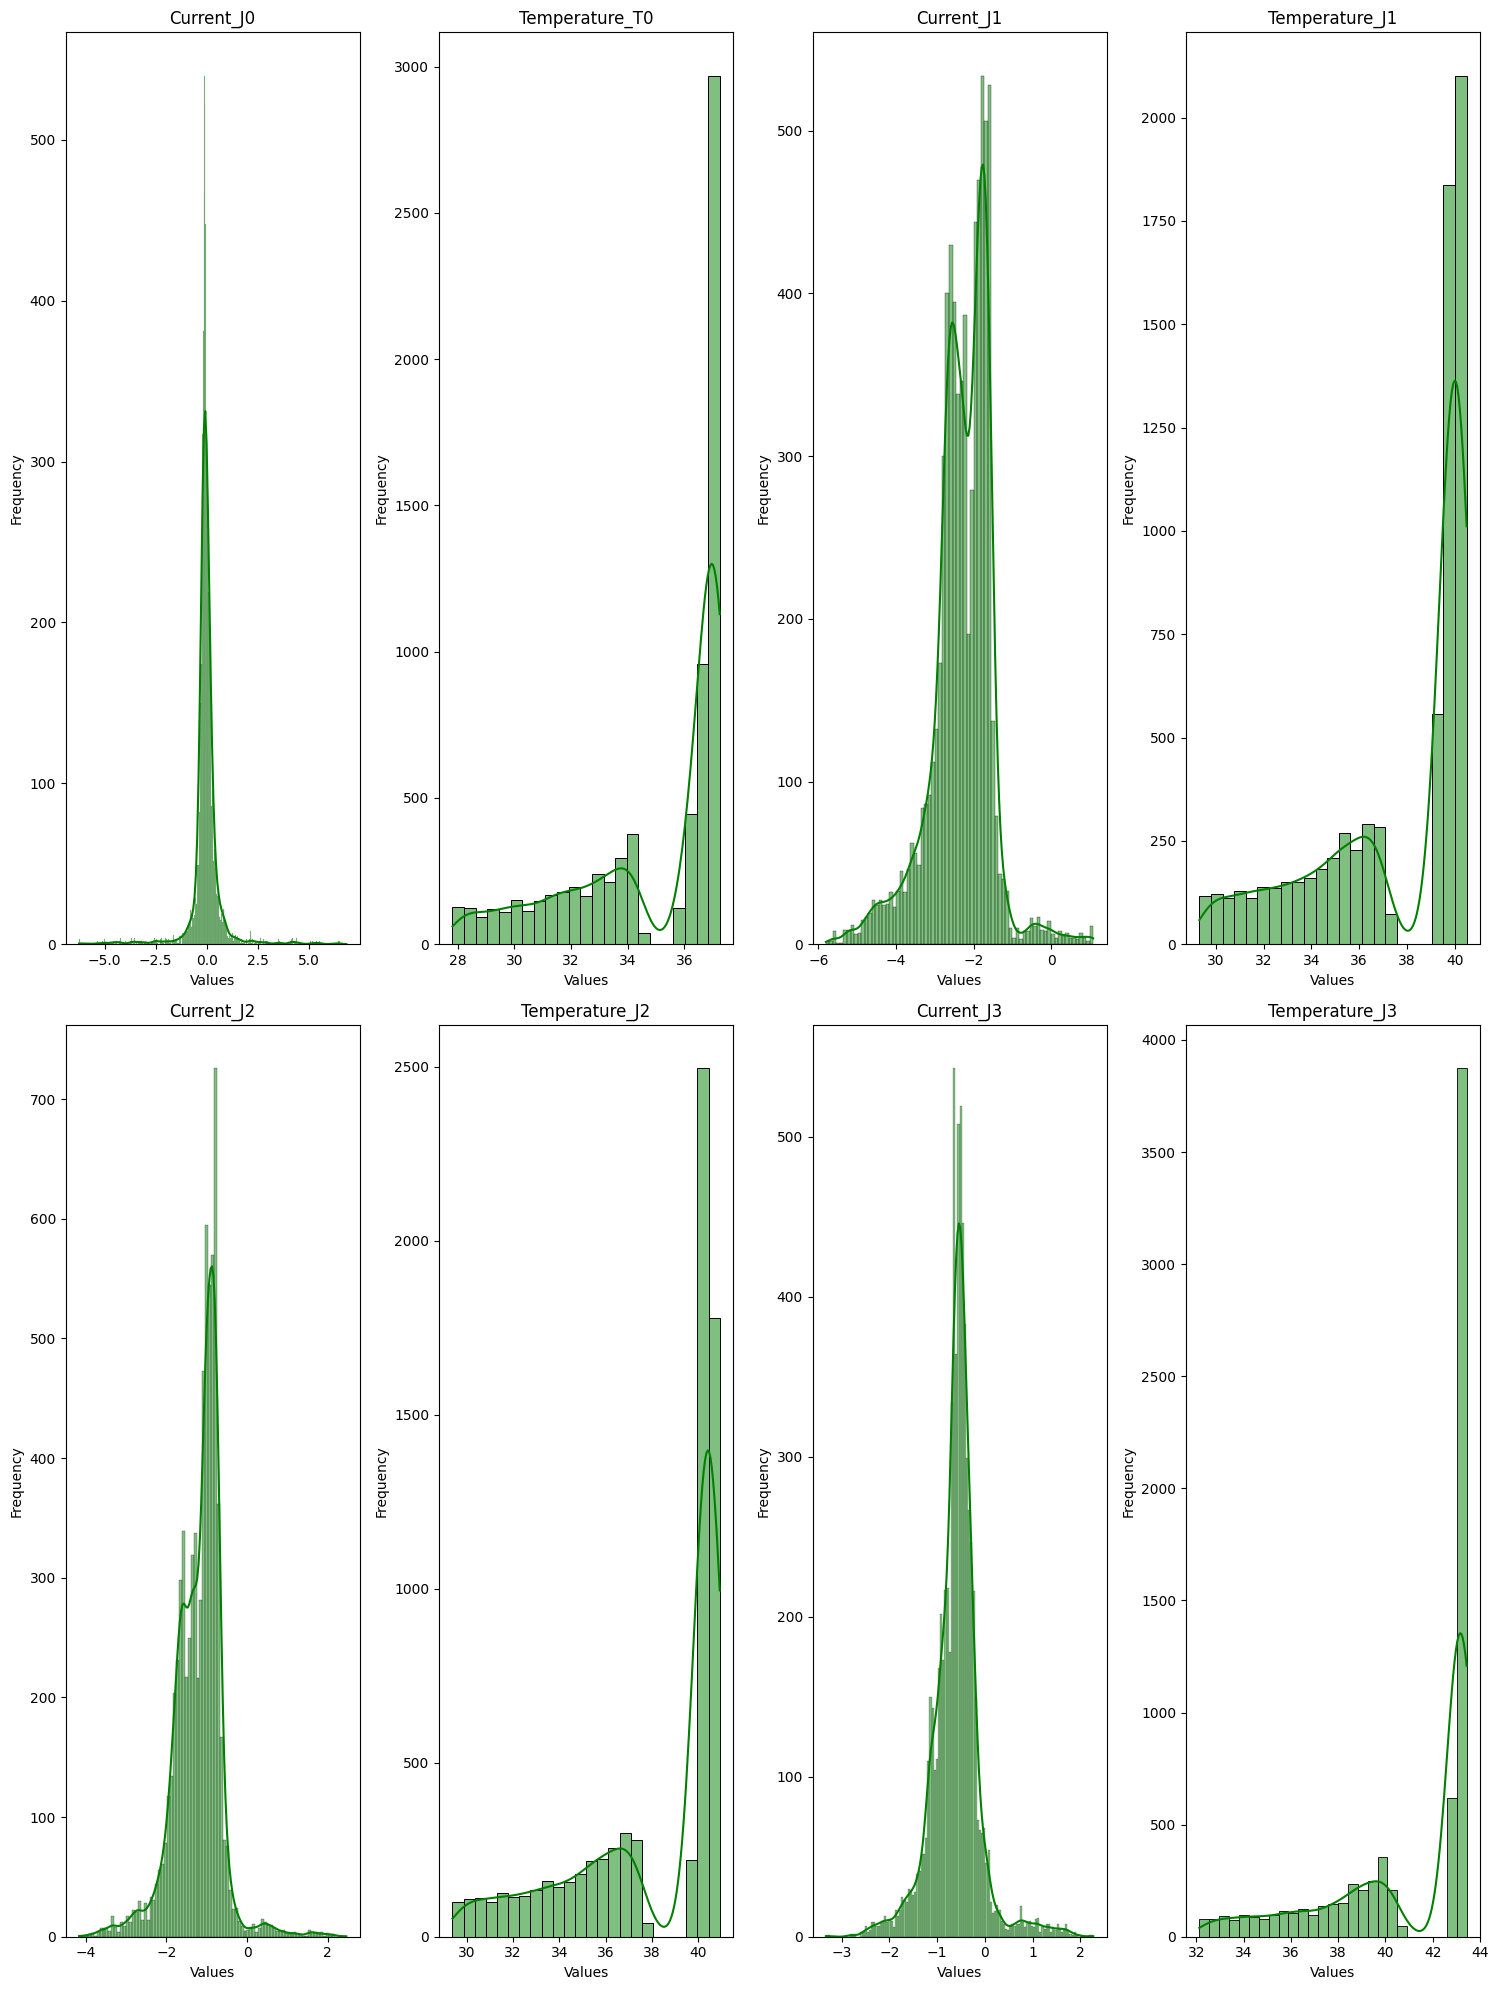

In [19]:
# Histogram plots of Current and temperature
columns_to_plot = [
    'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 
    'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3'
]

plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 4, i)  
    sns.histplot(df_clean[column], kde=True, color='green') 
    plt.title(column)  
    plt.xlabel('Values')  
    plt.ylabel('Frequency') 


plt.tight_layout()
plt.show()

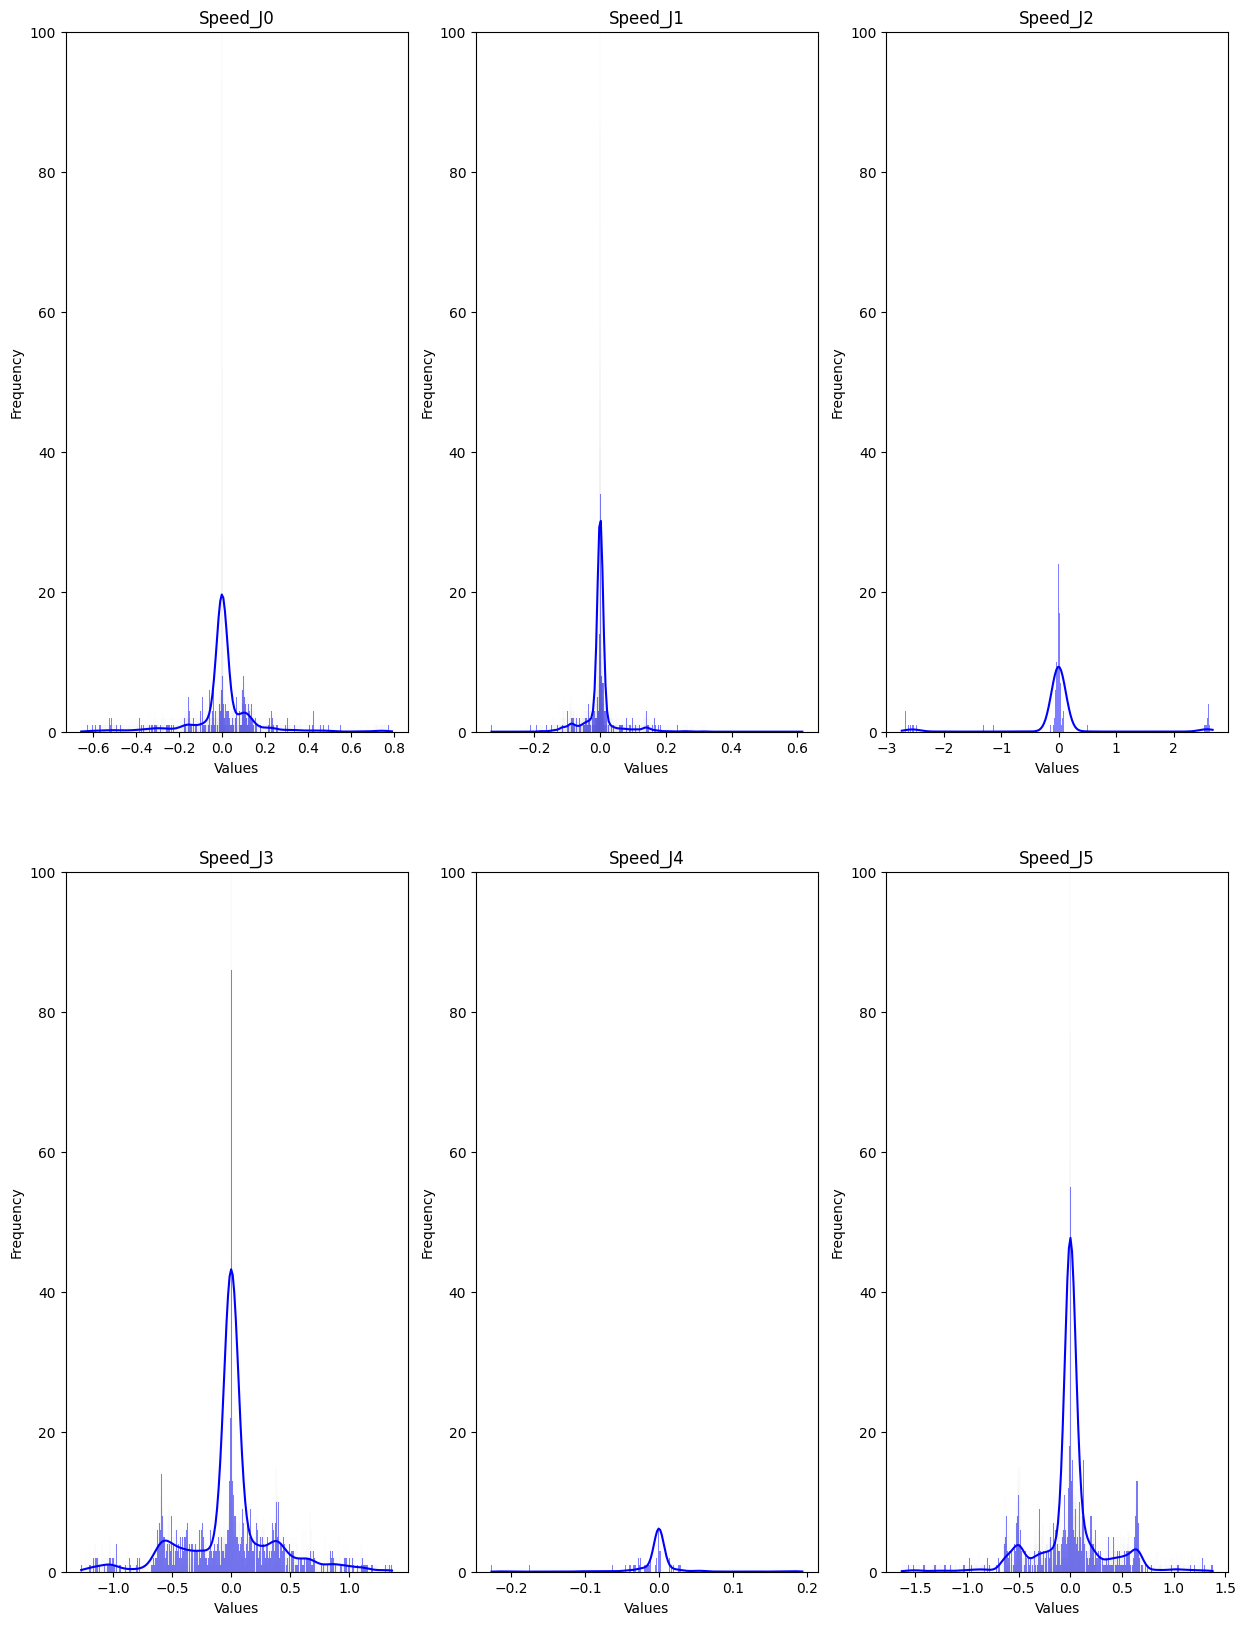

In [20]:
# Histogram plots of speeds
columns_to_plot = ['Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5']

plt.figure(figsize=(15, 20)) 
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df_clean[column], kde=True, color='blue')
    plt.title(column) 
    plt.xlabel('Values')  
    plt.ylabel('Frequency')
    plt.ylim(0,100)
plt.show()

The distribution plot shows that joint currents are approximately normally distributed and in case of joint speeds there are outliers which represent the robots' working. The joint speed will be zero when the cobots stop working and will be higher if there are any faulty movements

In [21]:
# Correlation
correlation=df_clean.corr()

In [22]:
correlation

index  Current_J0  Temperature_T0  Current_J1  \
index                 1.000000   -0.008207        0.900373   -0.018240   
Current_J0           -0.008207    1.000000       -0.009314    0.022532   
Temperature_T0        0.900373   -0.009314        1.000000   -0.023205   
Current_J1           -0.018240    0.022532       -0.023205    1.000000   
Temperature_J1        0.895731   -0.009484        0.999462   -0.023018   
Current_J2           -0.012321    0.058976       -0.019163    0.665123   
Temperature_J2        0.887082   -0.009825        0.998795   -0.022582   
Current_J3           -0.002413   -0.314995       -0.006077    0.389860   
Temperature_J3        0.869505   -0.009981        0.996209   -0.022531   
Current_J4            0.006753   -0.758236        0.010335   -0.109582   
Temperature_J4        0.855720   -0.009885        0.993953   -0.023206   
Current_J5            0.016469    0.015226       -0.000080   -0.096966   
Temperature_J5        0.852119   -0.009868        0.992579   -0.022535   
Speed_J0             -0.003038    0.043615        0.001965    0.391095   
Speed_J1              0.000419   -0.226628        0.000749    0.091001   
Speed_J2             -0.002345    0.356381       -0.000443   -0.083808   
Speed_J3              0.012746   -0.244565        0.004419   -0.179593   
Speed_J4              0.008192   -0.008498        0.002351   -0.196619   
Speed_J5             -0.010616    0.261849       -0.004765    0.020599   
Tool_current          0.005218    0.053898        0.001704    0.104208   
cycle                 0.995071   -0.007991        0.918589   -0.019799   
Robot_ProtectiveStop  0.059771    0.018110        0.058720   -0.108608   
grip_lost            -0.059416    0.012481       -0.087198    0.064817   

                      Temperature_J1  Current_J2  Temperature_J2  Current_J3  \
index                       0.895731   -0.012321        0.887082   -0.002413   
Current_J0                 -0.009484    0.058976       -0.009825   -0.314995   
Temperature_T0              0.999462   -0.019163        0.998795   -0.006077   
Current_J1                 -0.023018    0.665123       -0.022582    0.389860   
Temperature_J1              1.000000   -0.018798        0.999680   -0.005082   
Current_J2                 -0.018798    1.000000       -0.018252    0.424019   
Temperature_J2              0.999680   -0.018252        1.000000   -0.005140   
Current_J3                 -0.005082    0.424019       -0.005140    1.000000   
Temperature_J3              0.997606   -0.018573        0.998766   -0.004903   
Current_J4                  0.010388   -0.079308        0.010502    0.151713   
Temperature_J4              0.995650   -0.019452        0.997359   -0.005689   
Current_J5                 -0.000492    0.110741       -0.000428   -0.062907   
Temperature_J5              0.994866   -0.018458        0.996613   -0.004834   
Speed_J0                    0.001326    0.098587        0.001579   -0.167056   
Speed_J1                    0.000901   -0.088891        0.001117    0.224123   
Speed_J2                    0.000140    0.219213       -0.000202   -0.198596   
Speed_J3                    0.005230   -0.410194        0.004668    0.380436   
Speed_J4                    0.002420   -0.059585        0.002322    0.090220   
Speed_J5                   -0.005396    0.439471       -0.004970   -0.328304   
Tool_current                0.001870    0.119936        0.002328    0.009071   
cycle                       0.912878   -0.014799        0.904232   -0.003707   
Robot_ProtectiveStop        0.058526   -0.108862        0.057937   -0.066140   
grip_lost                  -0.088532    0.070432       -0.090443   -0.022318   

                      Temperature_J3  Current_J4  ...  Speed_J0  Speed_J1  \
index                       0.869505    0.006753  ... -0.003038  0.000419   
Current_J0                 -0.009981   -0.758236  ...  0.043615 -0.226628   
Temperature_T0              0.996209    0.010335  ...  0.001965  0.000749   
Current_J1         

<Axes: >

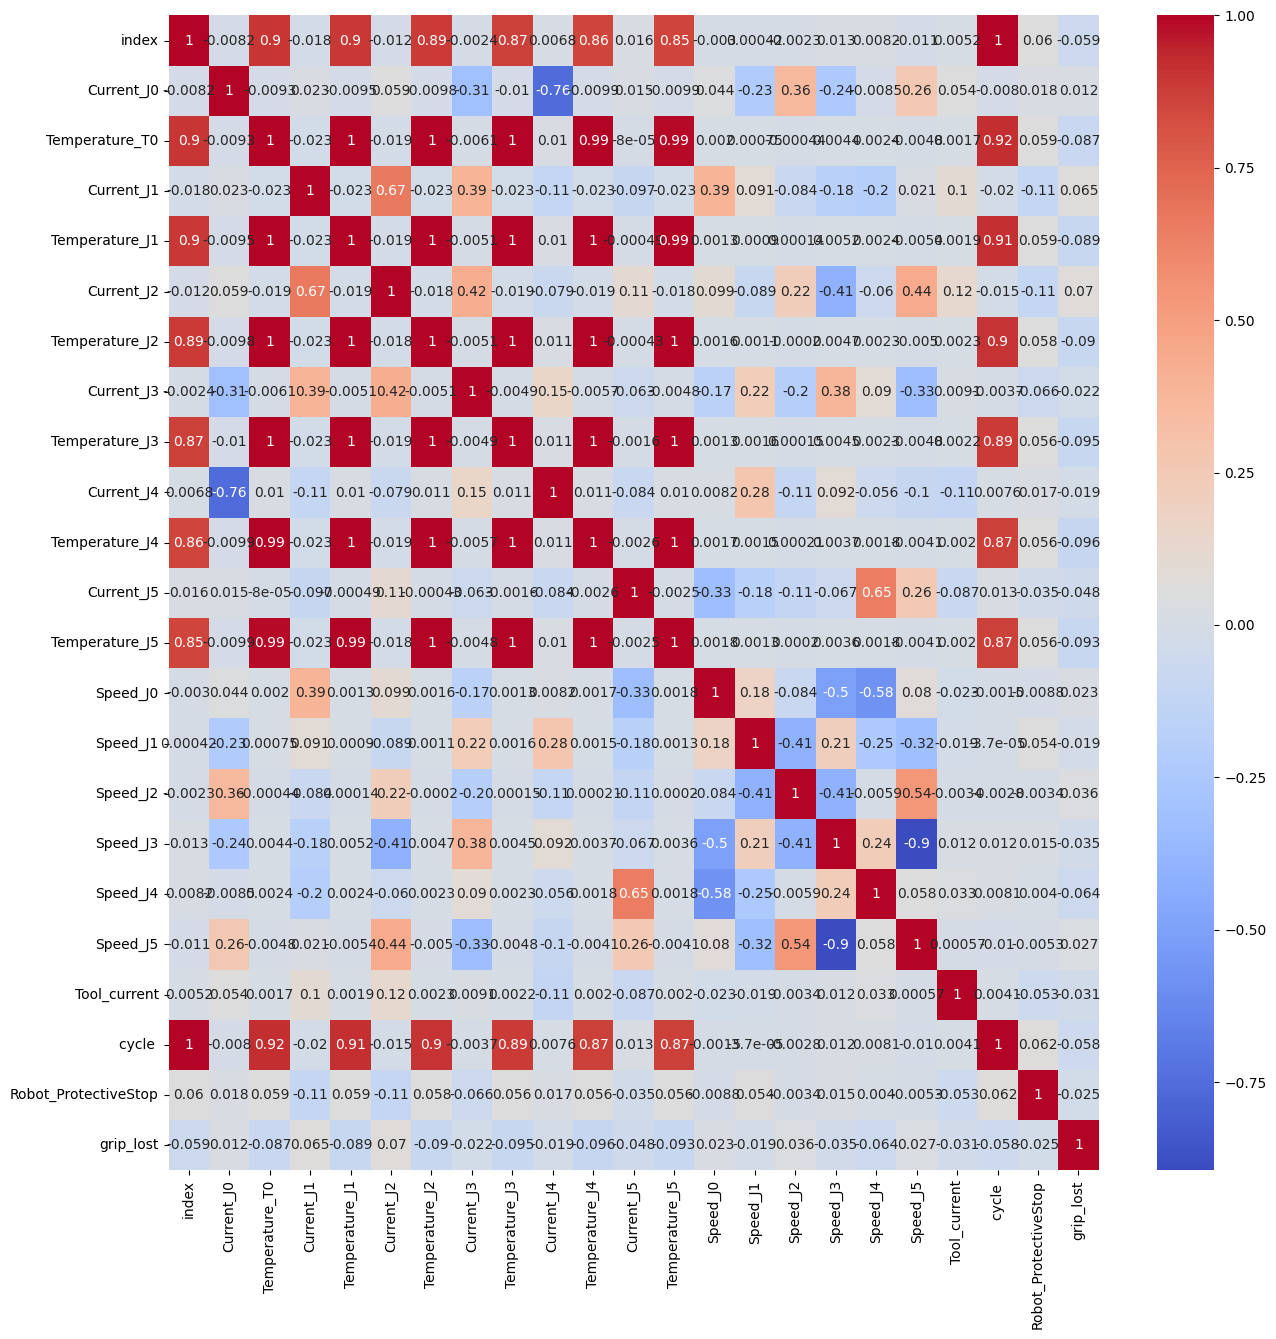

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Distribution of CurrentJ_3')

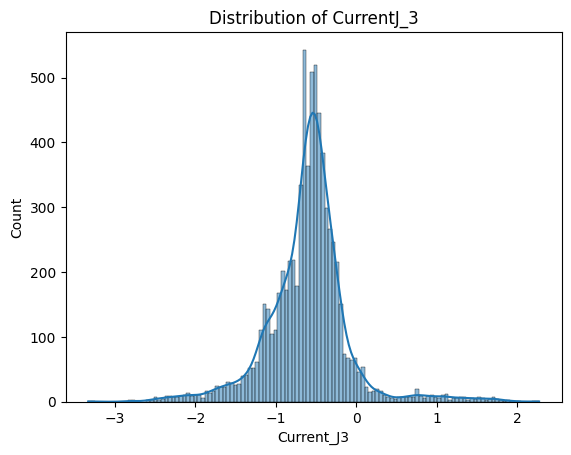

In [24]:
# Distribution of target variable
sns.histplot(df_clean['Current_J3'], kde=True)
plt.title('Distribution of CurrentJ_3')

 ## 7. Feature Engineering

In [25]:
# Encoding
le=LabelEncoder()

In [26]:
df_clean['grip_lost_encode']=le.fit_transform(df_clean['grip_lost'])

In [27]:
df_clean.head()

index  Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0      0    0.109628          27.875   -2.024669         29.3750   -1.531442   
1      1    0.595605          27.875   -2.278456         29.3125   -0.866556   
2      2   -0.229474          27.875   -2.800408         29.3125   -2.304336   
3      3    0.065053          27.875   -3.687768         29.3125   -1.217652   
4      4    0.884140          27.875   -2.938830         29.3750   -1.794076   

   Temperature_J2  Current_J3  Temperature_J3  Current_J4  ...  Speed_J1  \
0         29.3750   -0.998570         32.1250   -0.062540  ... -0.000490   
1         29.4375   -0.206097         32.1875   -1.062762  ... -0.000304   
2         29.4375   -0.351499         32.1250   -0.668869  ...  0.007795   
3         29.4375   -1.209115         32.1250   -0.819755  ... -0.004911   
4         29.4375   -2.356471         32.1875   -0.966427  ...  0.005567   

   Speed_J2  Speed_J3  Speed_J4  Speed_J5  Tool_current  cycle   \
0  0.001310 -0.132836 -0.007479 -0.152962      0.082732       1   
1  0.002185  0.001668 -0.000767  0.000417      0.505895       1   
2 -2.535874  0.379867  0.000455 -0.496856      0.079420       1   
3 -0.009096 -0.384196  0.018411  0.425559      0.083325       1   
4  0.001138 -0.353284  0.014994  0.180989      0.086379       1   

   Robot_ProtectiveStop  grip_lost  grip_lost_encode  
0                   0.0      False                 0  
1                   0.0      False                 0  
2                   0.0      False                 0  
3                   0.0      False                 0  
4                   0.0      False                 0  

[5 rows x 24 columns]

In [10]:
X=df_clean.drop(columns=['Current_J3'])

In [11]:
X

index  Current_J0  Temperature_T0  Current_J1  Temperature_J1  \
0         0    0.109628         27.8750   -2.024669         29.3750   
1         1    0.595605         27.8750   -2.278456         29.3125   
2         2   -0.229474         27.8750   -2.800408         29.3125   
3         3    0.065053         27.8750   -3.687768         29.3125   
4         4    0.884140         27.8750   -2.938830         29.3750   
...     ...         ...             ...         ...             ...   
7350   7404   -0.109017         37.1875   -2.261695         40.3125   
7351   7405   -0.098536         37.1875   -2.251992         40.3125   
7352   7406   -0.121100         37.1875   -2.280791         40.2500   
7353   7407   -0.129370         37.1875   -2.269061         40.3125   
7354   7408   -0.134429         37.1250   -2.244449         40.3125   

      Current_J2  Temperature_J2  Temperature_J3  Current_J4  Temperature_J4  \
0      -1.531442         29.3750         32.1250   -0.062540         32.2500   
1      -0.866556         29.4375         32.1875   -1.062762         32.2500   
2      -2.304336         29.4375         32.1250   -0.668869         32.3125   
3      -1.217652         29.4375         32.1250   -0.819755         32.2500   
4      -1.794076         29.4375         32.1875   -0.966427         32.3125   
...          ...             ...             ...         ...             ...   
7350   -1.082678         40.6875         43.3750   -0.019447         45.2500   
7351   -1.094420         40.6875         43.3750   -0.009186         45.2500   
7352   -1.121319         40.6875         43.3750   -0.002978         45.2500   
7353   -1.091610         40.6250         43.3750   -0.001136         45.2500   
7354   -1.098950         40.6875         43.3750   -0.025829         45.2500   

      ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0     ...  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479 -0.152962   
1     ... -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767  0.000417   
2     ...  1.369386e-01  0.007795 -2.535874  0.379867  0.000455 -0.496856   
3     ... -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411  0.425559   
4     ...  1.268088e-01  0.005567  0.001138 -0.353284  0.014994  0.180989   
...   ...           ...       ...       ...       ...       ...       ...   
7350  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7351  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7352  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7353  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
7354  ...  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   

      Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0         0.082732       1                   0.0      False  
1         0.505895       1                   0.0      False  
2         0.079420       1                   0.0      False  
3         0.083325       1                   0.0      False  
4         0.086379       1                   0.0      False  
...            ...     ...                   ...        ...  
7350      0.080013     264                   0.0      False  
7351      0.078740     264                   0.0      False  
7352      0.091471     264                   0.0      False  
7353      0.090026     264                   0.0      False  
7354      0.089097     264                   0.0      False  

[7355 rows x 22 columns]

In [12]:
y=df_clean['Current_J3']

In [31]:
y

0      -0.998570
1      -0.206097
2      -0.351499
3      -1.209115
4      -2.356471
          ...   
7350   -0.494714
7351   -0.515789
7352   -0.502406
7353   -0.491158
7354   -0.502397
Name: Current_J3, Length: 7355, dtype: float64

## 8. Feature Selection:

In [32]:
# Feature selection
sk=SelectKBest(score_func=f_regression,k=12)
x_kbest=sk.fit_transform(X,y)

# Get selected feature names
selected_features = X.columns[sk.get_support()]
print("Top Features Selected:")
print(selected_features)

Top Features Selected:
Index(['Current_J0', 'Current_J1', 'Current_J2', 'Current_J4', 'Current_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Robot_ProtectiveStop'],
      dtype='object')


The feature selection using Kbest found out that important features in the dataset are Current_J0, Current_J1,
Current_J2,Current_J4,Current_J5, Speed_J0,Speed_J1,Speed_J2,Speed_J3, Speed_J4, Speed_J5 and Robot_ProtectiveStop.

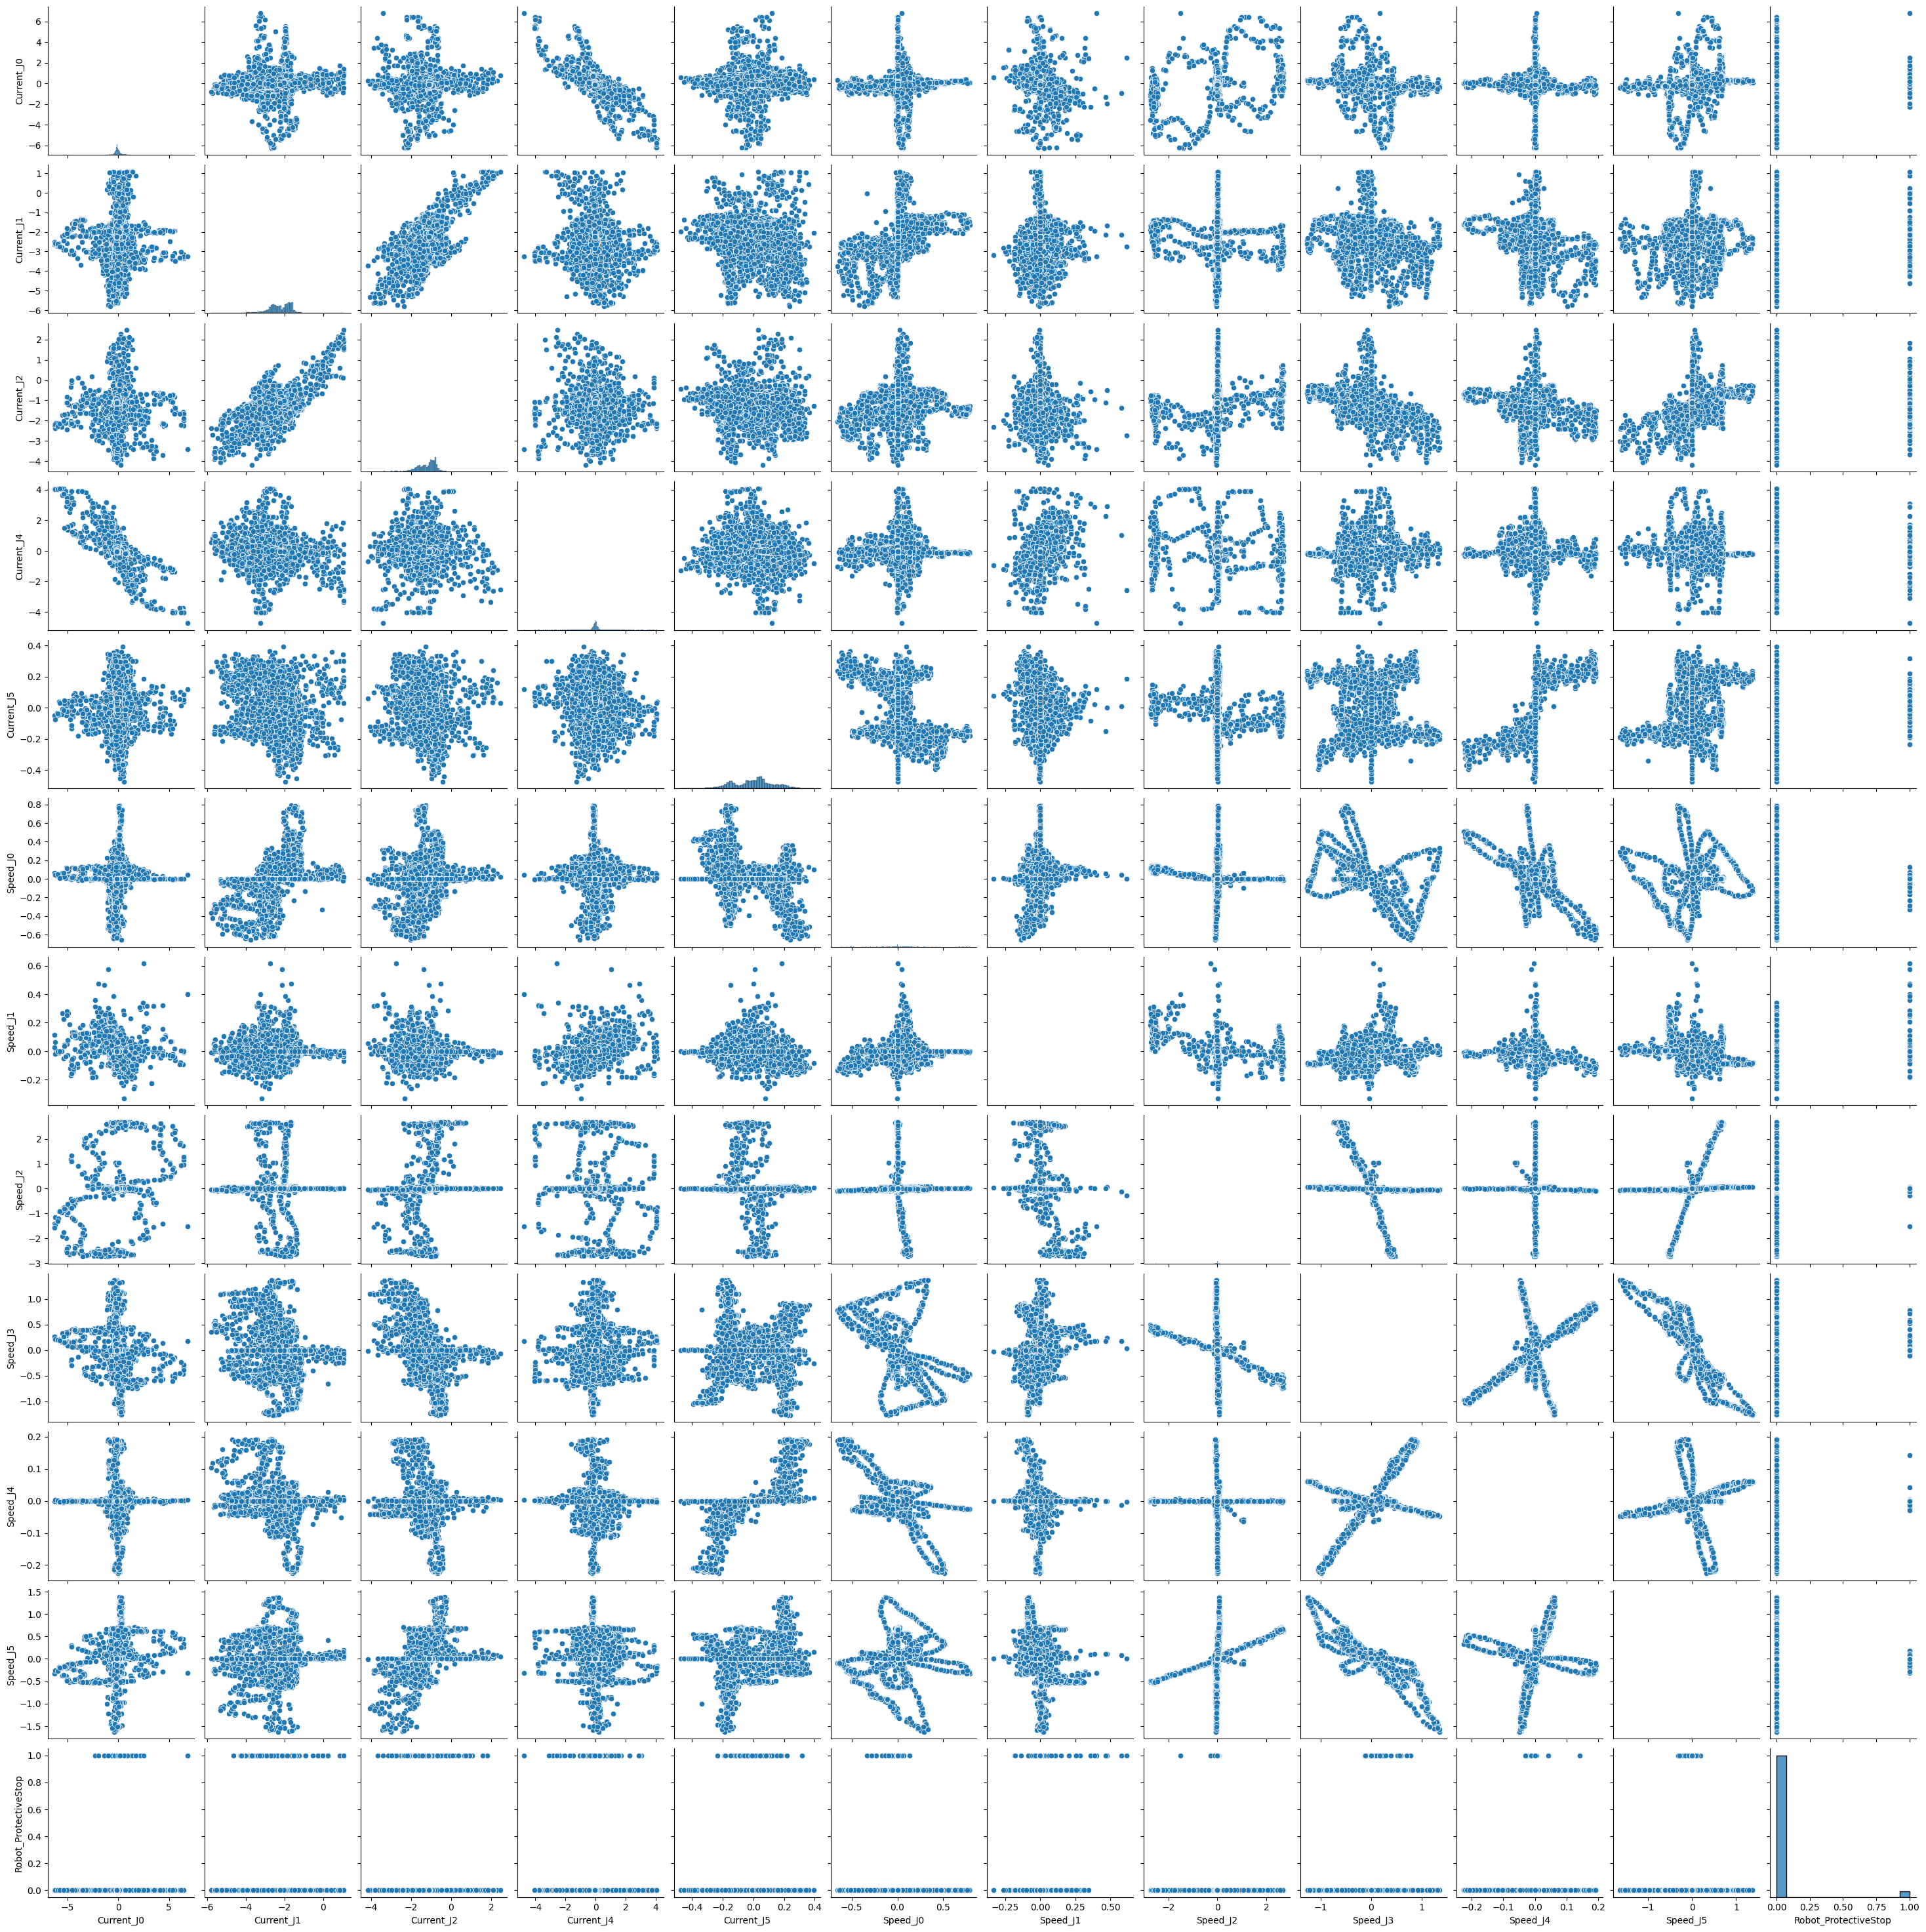

In [33]:
# Pair plot
sns.pairplot(df_clean[selected_features])

The heat map and pair plot indicate that joint current is highly sensitive and varies significantly with joint speed and temperature. 
This validates the selection of joint current for predictive analysis.

# 9. Split Data into Training and Testing Sets:

In [36]:

print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


Splitting data...


# 10. Feature scaling

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# 11. Build the ML Model:

In [38]:

print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'MLP': MLPRegressor(random_state=42, max_iter=1000)
}


Training models...


# 12. Model Evaluation

In [39]:
# Model training

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training MLP...


In [40]:
# model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Performance:

Linear Regression:
MAE: 0.2412
MSE: 0.1147
RMSE: 0.3387
R2: 0.5526

SVR:
MAE: 0.1074
MSE: 0.0268
RMSE: 0.1636
R2: 0.8956

Random Forest:
MAE: 0.1878
MSE: 0.0778
RMSE: 0.2789
R2: 0.6966

Gradient Boosting:
MAE: 0.1665
MSE: 0.0560
RMSE: 0.2367
R2: 0.7815

MLP:
MAE: 0.0987
MSE: 0.0219
RMSE: 0.1480
R2: 0.9146


In [41]:
# Finding best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: MLP


The R2 score of MLP model is higher than that of other models and MLP regressor model is chosen to be the best model to predict the joint current.

# 13. Hyperparameter Tuning
When it comes to hyperparameter tuning for MLPRegressor, selecting the right hyperparameters is crucial for optimizing model performance.
### Key Hyperparameters
### hidden_layer_sizes: 
This parameter defines the number of hidden layers and the number of neurons in each layer. A common approach is to start with a small number of layers and gradually increase them while monitoring performance.
### activation: 
The activation function can be set to options like 'relu', 'tanh', or 'logistic'. Each function has its strengths, and testing different functions can yield better results depending on the dataset.
### solver: 
The choice of solver (e.g., 'adam', 'sgd', 'lbfgs') can affect convergence speed and model performance. It's advisable to experiment with different solvers to find the most effective one for your specific problem.
### learning_rate:
This parameter controls the step size at each iteration while moving toward a minimum of the loss function. Options include 'constant', 'invscaling', and 'adaptive'. Adjusting the learning rate can help in achieving better convergence.

In [51]:
mlp = MLPRegressor(max_iter=1000, random_state=42)

In [52]:
# Define the parameter grid for Grid Search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [53]:
# Initializing grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [56]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

In [55]:
# Get the best parameters and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)


Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score (negative MSE):  -0.018314621472310694


In [57]:
# Evaluate the best model
# Train the best model from Grid Search on the entire training data
best_model = MLPRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")

Test MSE: 0.019264241426560986


In [58]:
test_r2=r2_score(y_test,y_test_pred)

In [59]:
print(test_r2)

0.9248787520516041


The increase in the R2 shows that the hyperparameter tuning increases the model performance

## Creating pipeline

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# create pipeline
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor())
])
#Train the pipeline

pipeline.fit(X_train,y_train)
# predict on test data
y_pred=pipeline.predict(X_test)

# 14. Save the model

In [61]:
# saving pipeline model
import joblib

In [62]:
joblib.dump(pipeline,'MLPRegreesor_pipeline.joblib')

['MLPRegreesor_pipeline.joblib']

In [63]:
loaded_pipeline=joblib.load('MLPRegreesor_pipeline.joblib')

In [76]:
# Loading unseen data
unseen_data=pd.read_csv('cobot_unseen.csv')

In [64]:
X_train.columns

Index(['Current_J0', 'Current_J1', 'Current_J2', 'Current_J4', 'Current_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Robot_ProtectiveStop'],
      dtype='object')

In [72]:
predictions=pipeline.predict(unseen_data)

In [71]:
unseen_data.columns

Index(['Current_J0', 'Current_J1', 'Current_J2', 'Current_J4', 'Current_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Robot_ProtectiveStop'],
      dtype='object')

# 15. Test with Unseen data

In [73]:
# display the result
print(f"Joint current J3:{predictions[0]}")

Joint current J3:-0.9514728987216948


In [74]:
unseen_data['unseen_pred']=predictions

In [75]:
unseen_data.to_csv('cobot_unseen.csv',index=False)

I used first 11 rows of original UR3 Cobot dataset as the unseen data and the model predicted the value of joint current J3 well.

original    predicted

![Alt text](unseen.png)

# 16. Interpretation of Results (Conclusion)

In [13]:
y_actual=y[0:11]

In [15]:
y_actual

0    -0.998570
1    -0.206097
2    -0.351499
3    -1.209115
4    -2.356471
5    -0.481834
6    -0.488380
7    -0.512541
8    -0.262015
9    -0.184550
10   -0.782304
Name: Current_J3, dtype: float64

In [16]:
un_data=pd.read_csv('cobot_unseen.csv')

In [19]:
un_data

Current_J0  Current_J1  Current_J2  Current_J4  Current_J5      Speed_J0  \
0     0.109628   -2.024669   -1.531442   -0.062540   -0.152622  2.955651e-01   
1     0.595605   -2.278456   -0.866556   -1.062762   -0.260764 -7.390000e-30   
2    -0.229474   -2.800408   -2.304336   -0.668869    0.039071  1.369386e-01   
3     0.065053   -3.687768   -1.217652   -0.819755    0.153903 -9.030032e-02   
4     0.884140   -2.938830   -1.794076   -0.966427    0.178998  1.268088e-01   
5     0.118961   -2.162542   -1.211779    0.015318    0.064844 -4.640000e-05   
6     0.086138   -1.757647   -0.960634    0.006506    0.053249  0.000000e+00   
7     0.075657   -1.836465   -0.961322   -0.021845    0.039228  0.000000e+00   
8    -0.186848   -2.563738   -1.418934    0.099942   -0.173527 -1.660036e-01   
9    -0.158912   -1.750777   -1.979400    0.079157   -0.209541  9.832304e-02   
10    1.014086   -1.875296   -0.549353   -0.159290   -0.095324  2.559032e-03   

    Speed_J1  Speed_J2  Speed_J3  Speed_J4      Speed_J5  \
0  -0.000490  0.001310 -0.132836 -0.007479 -1.529622e-01   
1  -0.000304  0.002185  0.001668 -0.000767  4.169020e-04   
2   0.007795 -2.535874  0.379867  0.000455 -4.968559e-01   
3  -0.004911 -0.009096 -0.384196  0.018411  4.255591e-01   
4   0.005567  0.001138 -0.353284  0.014994  1.809886e-01   
5   0.000093  0.000262  0.002171  0.000265 -2.470161e-03   
6   0.000000  0.000000  0.000000  0.000000  1.120000e-44   
7   0.000000  0.000000  0.000000  0.000000  0.000000e+00   
8   0.002409 -0.015483  0.350063 -0.009986 -1.927102e-01   
9   0.004996 -0.016996  0.496241 -0.017353 -5.886860e-01   
10 -0.006559  2.594071 -0.579771  0.000000  6.426101e-01   

    Robot_ProtectiveStop  unseen_pred  
0                  False    -0.951473  
1                  False    -0.254385  
2                  False    -0.337164  
3                  False    -1.160890  
4                  False    -2.297670  
5                  False    -0.514951  
6                  False    -0.506643  
7                  False    -0.527552  
8                  False    -0.283359  
9                  False    -0.217374  
10                 False    -0.750275

In [17]:
accuracy=r2_score(y_actual,un_data['unseen_pred'])

In [18]:
accuracy

0.996355308728422

The regression analysis of the UR3 cobot using the MLP regressor yielded a highly efficient model with an R2score of 0.996 for unseen data, 
indicating excellent predictive performance. The superior performance of the MLP regressor compared to other models can be attributed to the 
nonlinear nature of the data features. The inherent ability of the MLP regressor to capture and model complex, nonlinear relationships has
proven critical in accurately predicting the joint current J_3 of the UR3 cobot.

# 17. Future Work:

* The future work invloves combining this regression analysis results, and developing a classification model to predict critical variables for the 
safe stop of the UR3 cobot which will improve the overall performance, reliability, and safety of the UR3 cobot.
This approach can help identify specific states or conditions under which the cobot must cease operation to ensure safety and efficiency. 
* Creating a user-friendly platform using these results for monitoring cobot states for getting warning or alert for the its safe performance.

